# Logistic Regression

### Problem:
- Predict whether the forest fires or not

In [97]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

In [71]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/SornaRajaPrabhu/PracticeAlgerianFire/main/Algerian_forest_fires_dataset.csv',
    skiprows = 1
)

data.drop(
    [122, 123, 167],
    axis=0,
    inplace=True
)

In [72]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.5+ KB


## Change to numeric format

In [74]:
for col in data.columns[:6]:
    data[col] = data[col].astype(int)

In [75]:
for col in data.columns[6:13]:
    data[col] = data[col].astype(float)

In [76]:
data['Classes  '].replace(
    ['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ', 'not fire     ', 'not fire    '],
    ['not fire', 'fire', 'fire', 'fire', 'not fire', 'not fire', 'not fire', 'not fire'],
    inplace=True
)

data['Classes  '].replace(
    ['not fire', 'fire'],
    [0, 1],
    inplace=True
)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4    RH          243 non-null    int32  
 5    Ws          243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
dtypes: float64(7), int32(6), int64(1)
memory usage: 22.8 KB


## EDA

#### Check for Correlation

In [51]:
data.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123


<AxesSubplot:>

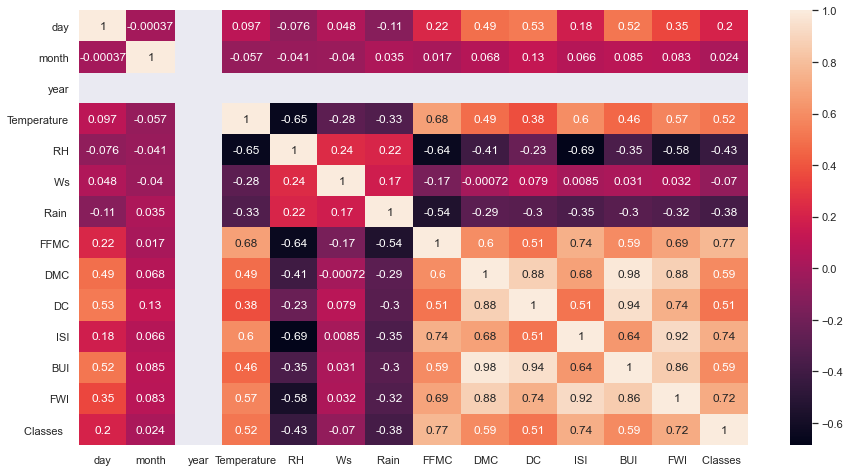

In [52]:
sns.set(
    rc={
        'figure.figsize':(15,8)
    }
)

sns.heatmap(
    data.corr(),
    annot=True
)

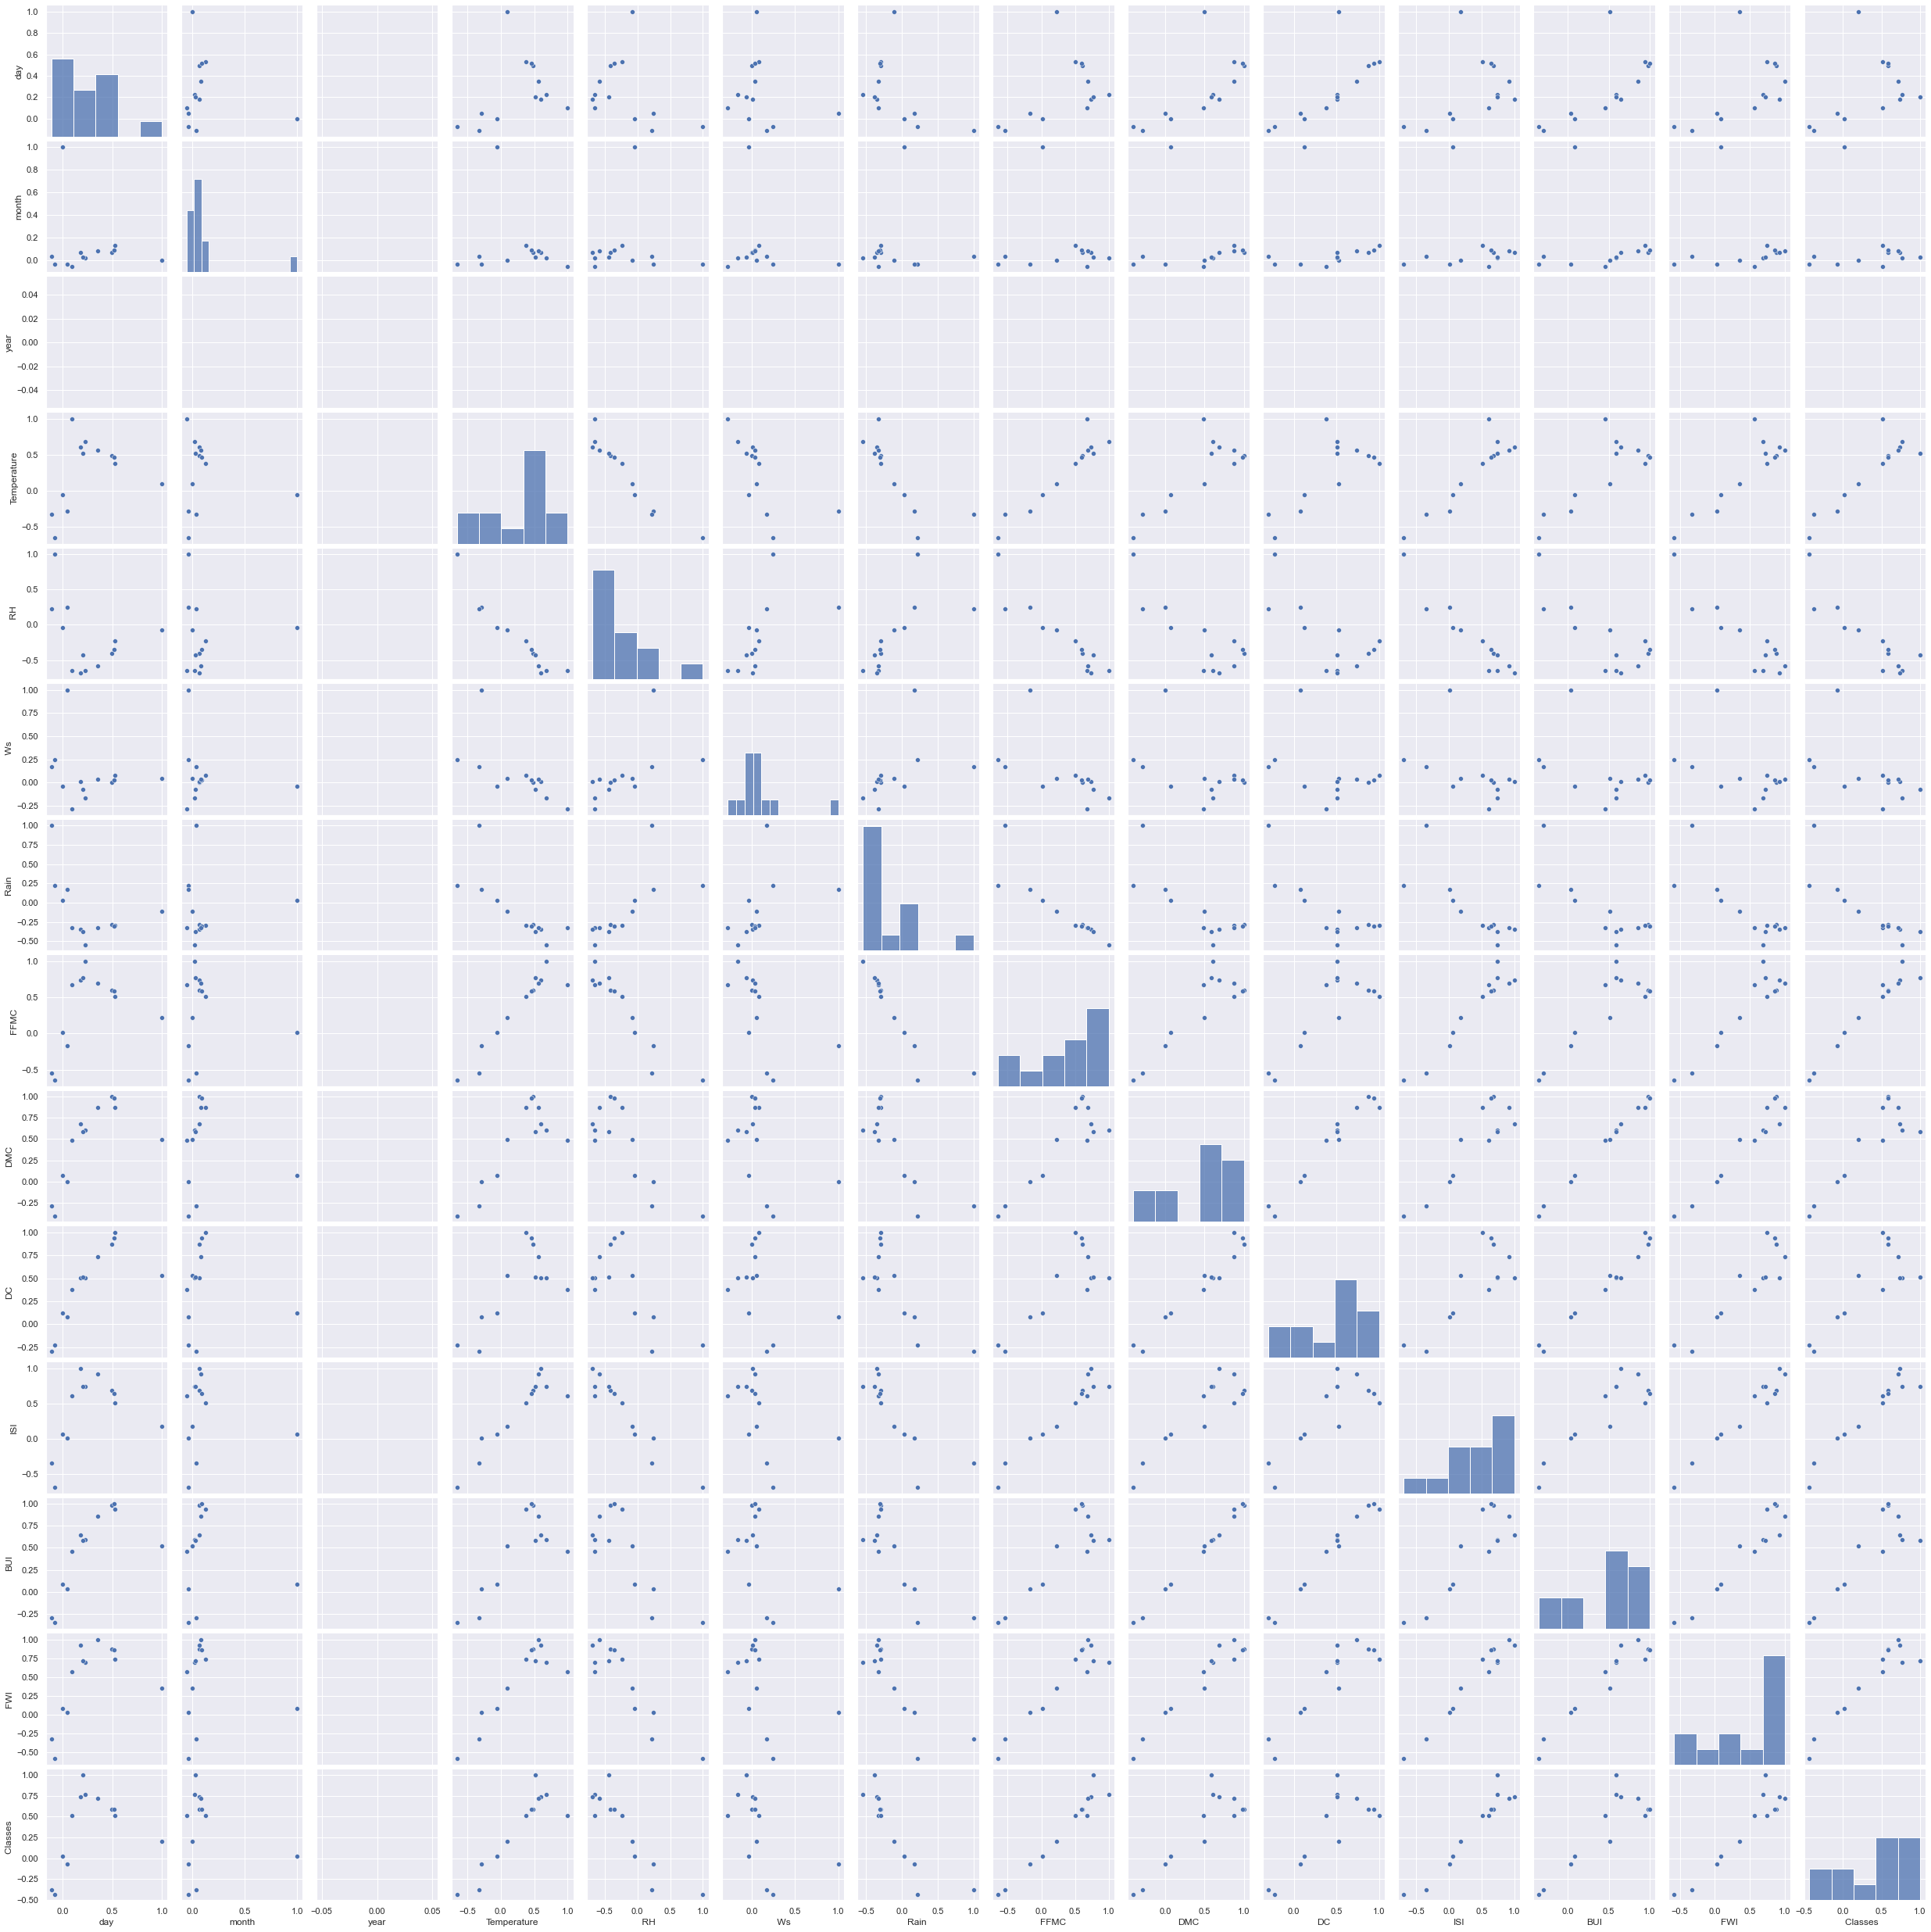

In [53]:
sns.pairplot(
    data.corr()
)

In [54]:
data.corr()[data.corr()>0.50]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.527952,NaN,0.517117,NaN,NaN
month,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.676568,NaN,NaN,0.603871,NaN,0.566670,0.516015
RH,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ws,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rain,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFMC,NaN,NaN,NaN,0.676568,NaN,NaN,NaN,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.527952,NaN,NaN,NaN,NaN,NaN,NaN,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123


In [55]:
data.corr()[data.corr()<-0.50]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,NaN,NaN,NaN,-0.651400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,NaN,NaN,NaN,-0.6514,NaN,NaN,NaN,-0.644873,NaN,NaN,-0.686667,NaN,-0.580957,NaN
Ws,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.543906,NaN,NaN,NaN,NaN,NaN,NaN
FFMC,NaN,NaN,NaN,NaN,-0.644873,NaN,-0.543906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Marking the positive correlation
- *name - highly correlated

- day - DC, BUI
- month - 
- year - 
- Temperature - FFMC ISI FWI classes
- RH - 
- Ws - 
- Rain - 
- FFMC - Temp, DMC, DC, *ISI, BUI, FWI, *classes
- DMC - FFMC, *DC, ISI, *BUI, *FWI, classes
- DC - day, FFMC, *DMC, ISI, *BUI, *FWI, classes
- ISI - Temp, *FFMC, DMC, DC, BUI, *FWI, *classes
- BUI - day, FFMC, *DMC, *DC, ISI, *FWI, Classes
- FWI - Temp, FFMC, *DMC, *DC, *ISI, *BUI, *Classes
- Classes - Temp, *FFMC, DMC, DC, *ISI, BUI, *FWI

## Marking the negative Correlation
- *name - Hightly negative correlation
- Temp - RH
- RH - Temp, FFMC, ISI, FWI
- Rain - FFMC
- FFMC - RH, Rain
- ISI - RH
- FWI - RH

#### Temp, DMC, FFMC, RH, Rain are the features which are enough to perform

<AxesSubplot:>

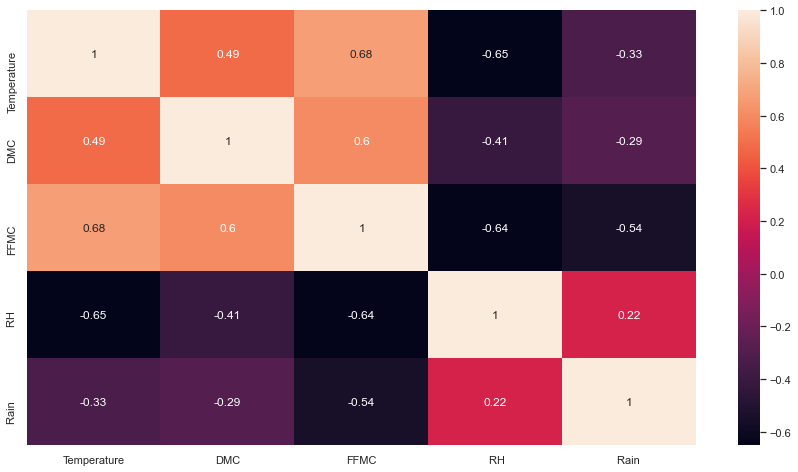

In [56]:
sns.set(
    rc={
        'figure.figsize':(15,8)
    }
)

sns.heatmap(
    data[['Temperature', 'DMC', 'FFMC', ' RH', 'Rain ']].corr(),
    annot=True
)

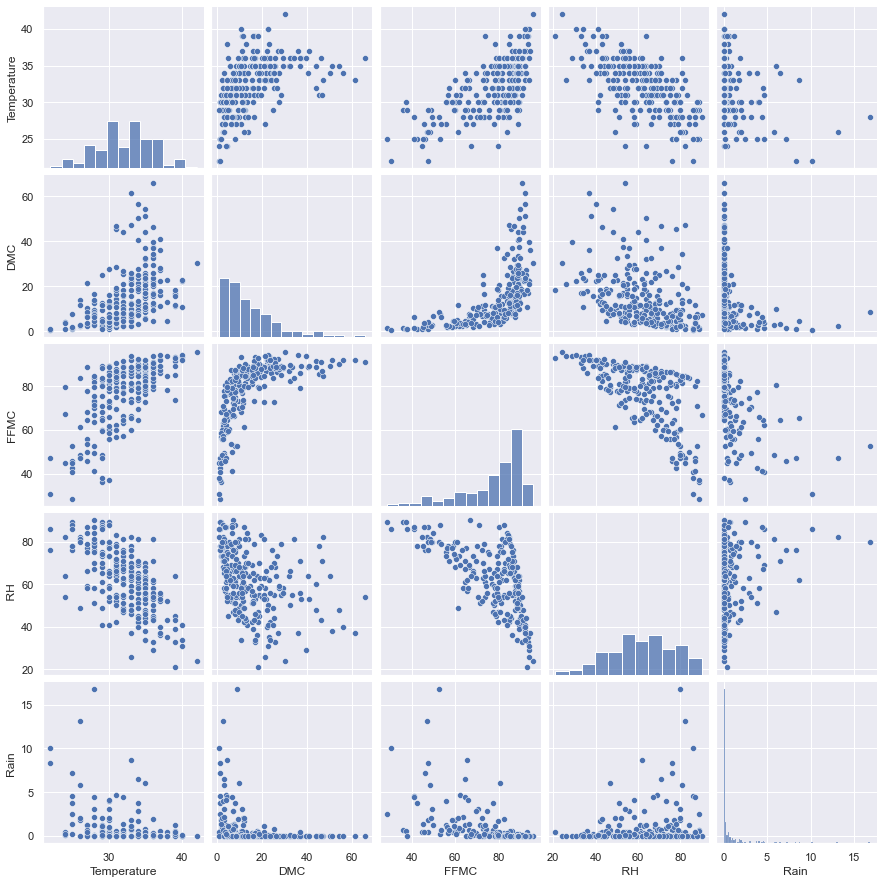

In [57]:
sns.pairplot(
    data[['Temperature', 'DMC', 'FFMC', ' RH', 'Rain ']]
)

### EDA Observations

- There is no NA
### Temp, DMC, FFMC, RH, Rain are the features which are enough to perform

In [78]:
newData = data[['Temperature', 'DMC', 'FFMC', ' RH', 'Rain ', 'Classes  ']]

# Distribution of data

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

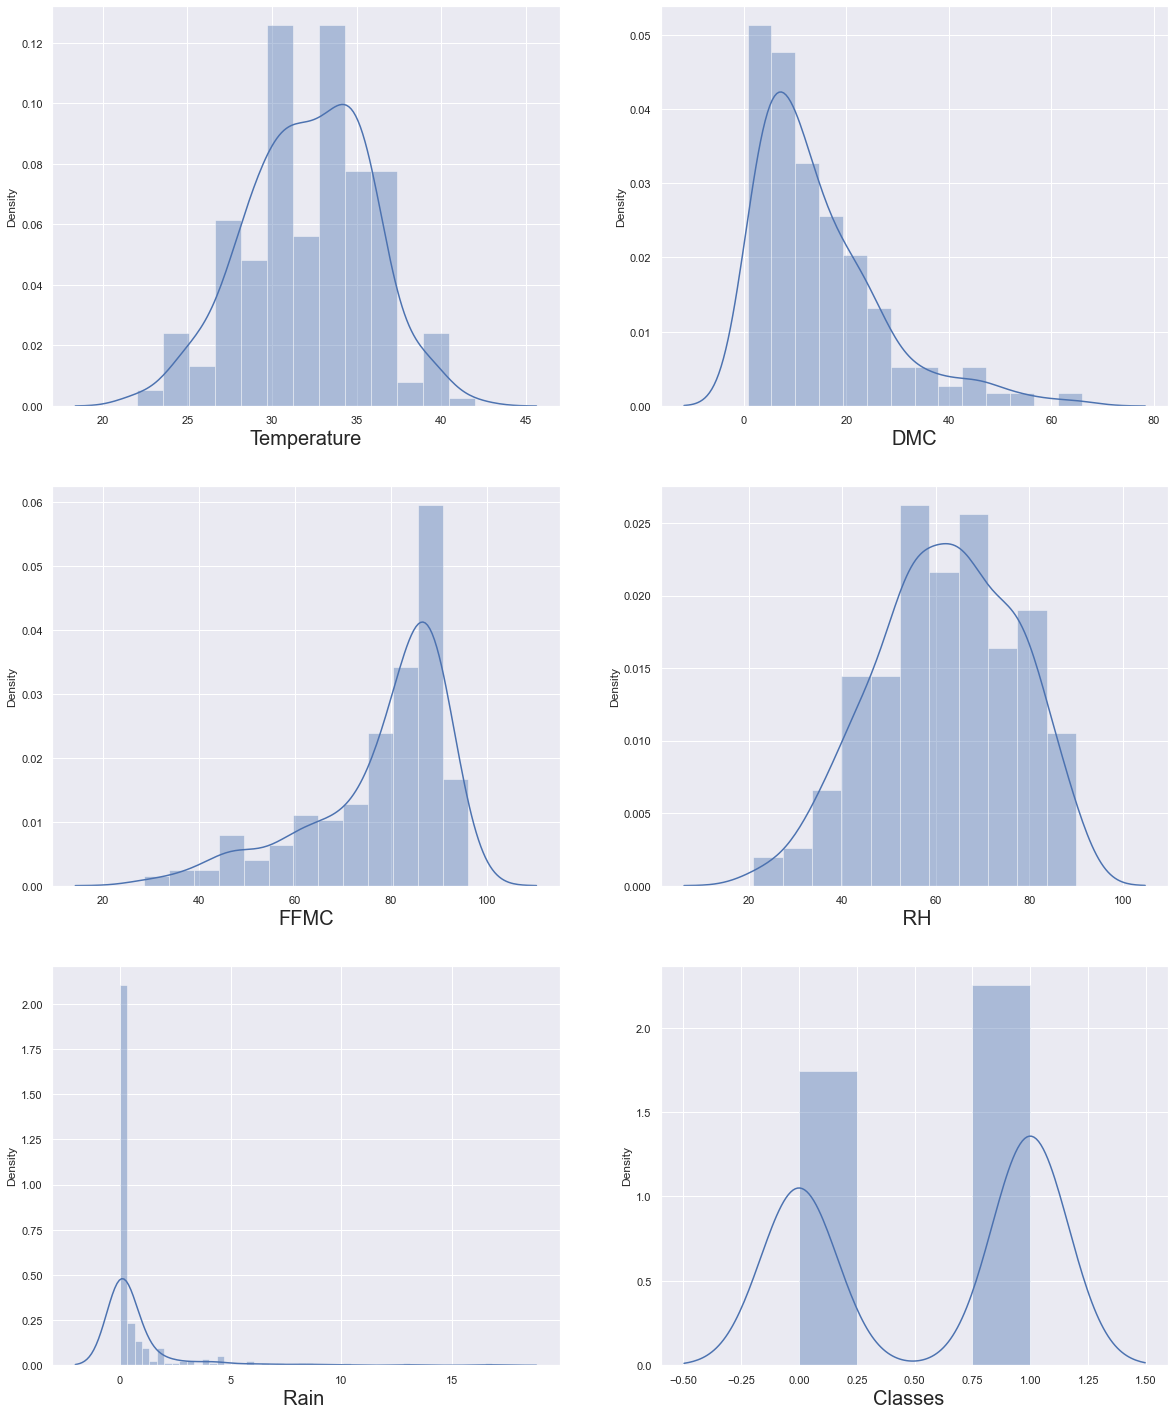

In [59]:
plt.figure(
    figsize=(20,25),
    facecolor='white'
)
plotnumber=1

for column in newData:
    if plotnumber <= 6 :     # as there are 6 columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(newData[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [103]:
X = newData.drop('Classes  ', axis=1)
y = newData['Classes  ']

In [104]:
trainx, testx, trainy, testy = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1
)

In [105]:
scaler = StandardScaler()

trainx['Temperature'] = scaler.fit_transform(trainx[['Temperature']])
trainx[' RH'] = scaler.fit_transform(trainx[[' RH']])

trainx['DMC'] = np.log(trainx[['DMC']])
trainx['FFMC'] = np.log(trainx[['FFMC']])

testx['Temperature'] = scaler.transform(testx[['Temperature']])
testx[' RH'] = scaler.transform(testx[[' RH']])

testx['DMC'] = np.log(testx[['DMC']])
testx['FFMC'] = np.log(testx[['FFMC']])

<ipython-input-105-cef3c346c3bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainx['Temperature'] = scaler.fit_transform(trainx[['Temperature']])
<ipython-input-105-cef3c346c3bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainx[' RH'] = scaler.fit_transform(trainx[[' RH']])
<ipython-input-105-cef3c346c3bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

# Logictic regression - without class imbalance

In [83]:
model = LogisticRegression()

In [84]:
model.fit(trainx, trainy)

LogisticRegression()

In [85]:
predY = model.predict(testx)

# Cost Function

In [98]:
log_loss(
    testy,
    predY
)

4.73137209234791

# Performance Metrics

In [120]:
confusion_matrix(
    testy,
    predY
)

array([[31,  3],
       [ 7, 32]], dtype=int64)

In [88]:
accuracy_score(
    testy,
    predY
)

0.863013698630137

In [89]:
precision_score(
    testy,
    predY
)

0.9142857142857143

In [90]:
recall_score(
    testy,
    predY
)

0.8205128205128205

In [92]:
fbeta_score(
    testy,
    predY,
    beta=1
)

0.8376963350785339

In [95]:
fbeta_score(
    testy,
    predY,
    beta=0.5
)

0.8938547486033518

In [96]:
fbeta_score(
    testy,
    predY,
    beta=2
)

0.8376963350785339

# Logistic Regression - with class imbalance

In [106]:
model = LogisticRegression(
    class_weight='balanced'
)

In [107]:
model.fit(
    trainx,
    trainy
)

LogisticRegression(class_weight='balanced')

In [108]:
predy = model.predict(testx)

# Cost Function

In [109]:
log_loss(
    testy,
    predY
)

4.73137209234791

# Performance Metrics

In [121]:
confusion_matrix(
    testy,
    predY
)

array([[31,  3],
       [ 7, 32]], dtype=int64)

In [110]:
accuracy_score(
    testy,
    predY
)

0.863013698630137

In [118]:
precision_score(
    testy,
    predY
)

0.9142857142857143

In [119]:
recall_score(
    testy,
    predY
)

0.8205128205128205

In [122]:
fbeta_score(
    testy,
    predY,
    beta=1
)

0.8648648648648648

In [123]:
fbeta_score(
    testy,
    predY,
    beta=0.5
)

0.8938547486033518

In [124]:
fbeta_score(
    testy,
    predY,
    beta=2
)

0.8376963350785339